# Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

```
f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)
```

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:


где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
* Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
* Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
* Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

<type 'numpy.float64'> 2.505416407


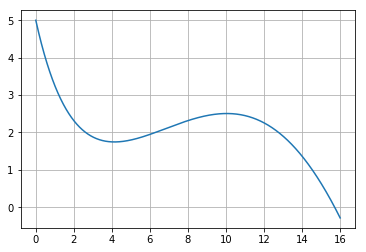

In [37]:
import math
import numpy as np
import matplotlib.pyplot as plt

def fnc(x):
    return (np.sin(x/5.) * np.exp(x/10.) + 5. * np.exp (-x/2.) )

print type(fnc(10)), fnc(10)


rr = np.arange(0, 16, 0.001)
plt.plot(rr, fnc(rr))
plt.grid(True)
plt.show()


A: [[ 1  1]
 [ 1 15]]
B: [ 3.25221687  0.63522142]
X: [ 3.43914511 -0.18692825]
[ 3.25221687  0.63522142]
[ 3.25221687  0.63522142]
<type 'float'> 0.635221419579
160 160


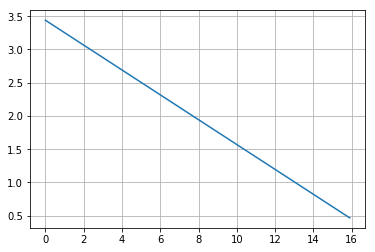

In [149]:
from scipy import linalg

a = np.array([[1,1],[1,15]])
b = np.array([fnc(1),fnc(15)])

print "A:", a
print "B:",b

M= x = linalg.solve(a,b, overwrite_a=True, overwrite_b=True)
print "X:", x
print np.dot(a, x)

print np.dot(a, x)


def f2(x):
    return np.dot(M, np.array([1,x]))


print type(float(f2(1))), f2(15)


rr = np.arange(0, 16, 0.1)
print len([f2(i) for i in rr]), len(rr)
plt.plot(rr, [f2(i) for i in rr])
plt.grid(True)
plt.show()


A: [[  1   1   1]
 [  1   8  64]
 [  1  15 225]]
B: [ 3.25221687  2.31617016  0.63522142]
X: [ 3.32512949 -0.06531159 -0.00760104]
[ 3.25221687  2.31617016  0.63522142]
<type 'float'> 0.635221419579
160 160


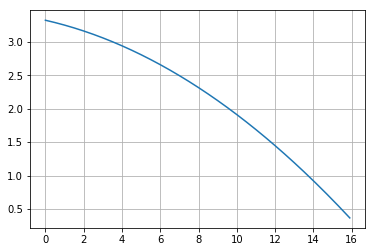

In [155]:
from scipy import linalg

a = np.array([[1, 1, 1], [1, 8, 64], [1, 15, 225]])
b = np.array([fnc(1),fnc(8),fnc(15)])

print "A:", a
print "B:",b

M= x = linalg.solve(a,b, overwrite_a=True, overwrite_b=True)
print "X:", x
print np.dot(a, x)


def f2(x):
    return np.dot(M, np.array([1, x, x*x]))


print type(float(f2(1))), f2(15)


rr = np.arange(0, 16, 0.1)
print len([f2(i) for i in rr]), len(rr)
plt.plot(rr, [f2(i) for i in rr])
plt.grid(True)
plt.show()


A: [[   1    1    1    1]
 [   1    4   16   64]
 [   1   10  100 1000]
 [   1   15  225 3375]]
B: [ 3.25221687  1.74684595  2.50541641  0.63522142]
X: [ 4.36264154 -1.29552587  0.19333685 -0.00823565]
[ 3.25221687  1.74684595  2.50541641  0.63522142]
<type 'float'> 0.635221419579
160 160


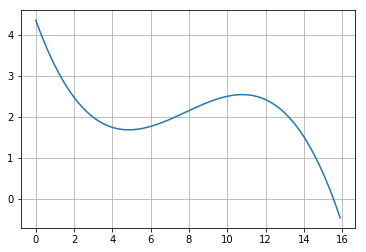

In [165]:
from scipy import linalg

a = np.array([[1, 1, 1, 1], [1, 4, 16, 64], [1, 10, 100, 1000], [1, 15, 225, 3375]])
b = np.array([fnc(1),fnc(4),fnc(10),fnc(15)])

print "A:", a
print "B:",b

M = x = linalg.solve(a,b, overwrite_a=True, overwrite_b=True)
print "X:", x
print np.dot(a, x)


def f2(x):
    return np.dot(M, np.array([1, x, x*x, math.pow(x,3)]))


print type(float(f2(1))), f2(15)


rr = np.arange(0, 16, 0.1)
print len([f2(i) for i in rr]), len(rr)
plt.plot(rr, [f2(i) for i in rr])
plt.grid(True)
plt.show()


In [156]:
15*15*15

3375